# **GRBs proyect**

This code shows the calculation of the sensitivity curve for the work performed during the high energy week (06-11 / 04 / 2024). 

## **TOTAL ATENUATION**

In [1]:
#WE FIRST LOAD THE PACKAGES NEEDED FOR THE WHOLE PROJECT, THESE BEING NUMPY AND MATPLOTLIB

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') # ESTE ES UN ESTILO PARA TODAS LAS GRÁFICAS


[  5.     6.     8.    10.    15.    20.    26.71  26.71  30.    31.81
  31.81  40.    50.    60.    80.   100.   150.   200.   300.  ]
[8.392e+02 5.286e+02 2.492e+02 1.381e+02 4.656e+01 2.144e+01 9.832e+00
 2.943e+01 2.182e+01 1.874e+01 3.494e+01 1.930e+01 1.067e+01 6.542e+00
 3.019e+00 1.671e+00 6.072e-01 3.246e-01 1.628e-01]


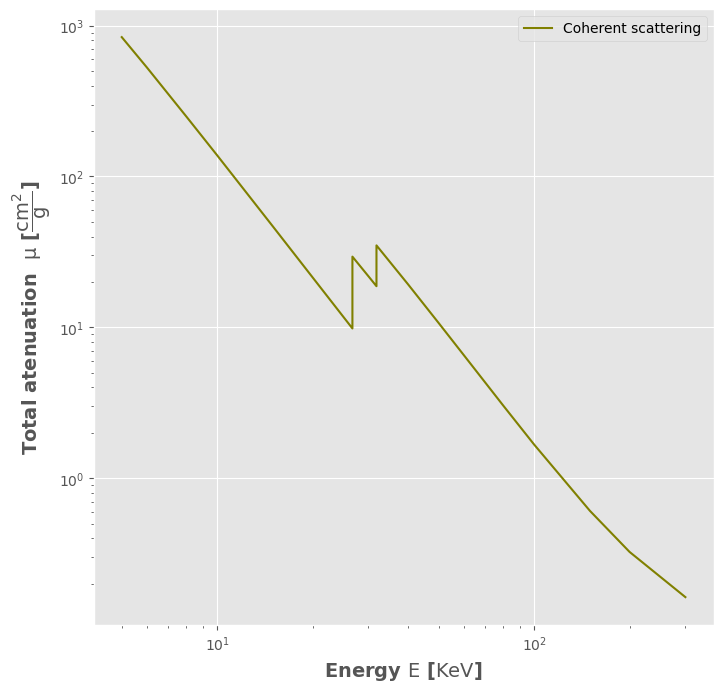

In [2]:
'''
FIRST WE EXTRACT THE DATA (FOR THE COMPOSITION OF OUR DETECTOR), IN THIS CASE FROM THE WEBSITE: 
https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

THE APPROPRIATE PARAMETERS ARE SELECTED ON THIS WEBSITE: ALL GRAPH OPTIONS, 
ENERGY RANGE: 0.005 - 0.300 KeV (we put 300 for later data extrapolation). 
AS A FINAL STEP WE DOWNLOAD THE DATA
'''
energy, mu = np.loadtxt("CdTe_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND ATTENUATION COEFFICIENT COLUMNS 


#THE NEXT STEP IS TO CHANGE UNITS: MeV TO KeV

energy=energy*1000

#YOU CAN PRINT BOTH VARIABLES TO SEE THAT EVERYTHING IS CORRECT.

print(energy)  
print(mu)

#WE PLOT THE DATA ON A GRAPH

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy, mu, label='Coherent scattering', color = 'olive') 
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## **DATA INTERPOLATION**

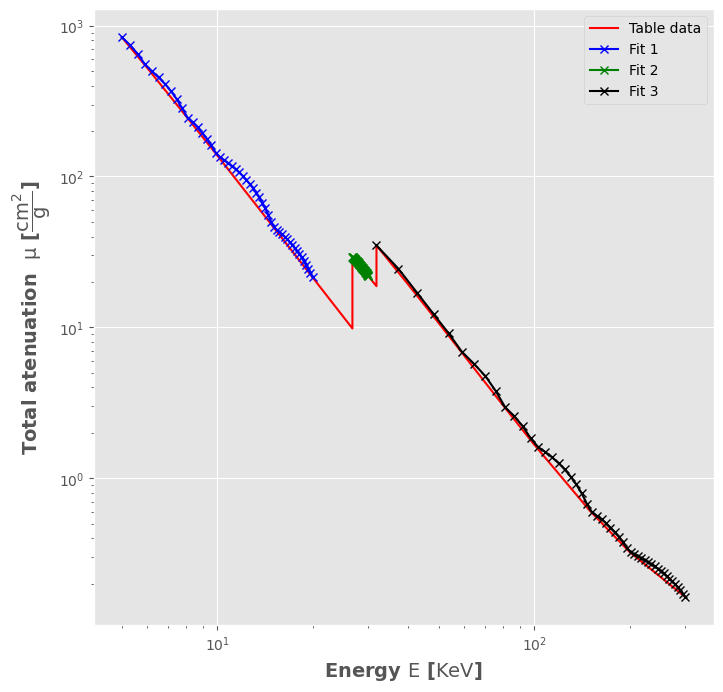

In [3]:
'''
NOW WE DEFINE THE AREAS TO BE INTERPOLATED. IN THIS CASE WE CHOOSE THOSE TO THE RIGHT AND LEFT OF THE K-EDGE. 
OUR INTEREST IS TO INTERPOLATE AS MANY POINTS AS POSSIBLE TO OBTAIN VALUES OF THE ATTENUATION COEFFICIENT 
THAT IS NOT IN OUR ORIGINAL SAMPLE.

'''
'''
WE DEFINE THE INTERVALS TO BE INTERPOLATED (THIS MUST BE DONE VISUALLY, 
MAKING SURE THAT THE VALUES ARE NOT CLOSE TO THE K-EDGE).

'''

xvals1 = np.linspace(energy[0],energy[5], 50)
yinterp1 = np.interp(xvals1, energy, mu)

xvals2 = np.linspace(energy[6],energy[8], 50)
yinterp2 = np.interp(xvals2, energy, mu)

xvals3 = np.linspace(energy[10],energy[-1], 50)
yinterp3 = np.interp(xvals3, energy, mu)



#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy, mu, 'r-', label='Table data')
plt.plot(xvals1, yinterp1, 'bx-', label='Fit 1')
plt.plot(xvals2, yinterp2, 'gx-', label='Fit 2')
plt.plot(xvals3, yinterp3, 'kx-', label='Fit 3')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [4]:
'''
NOW WE PUT TOGETHER THE DATA FROM FIT 1 AND FIT 2 IN A SINGLE ARRAY

'''

# Concatenate x_interpolation arrays.
x_interpolation = np.concatenate((xvals1, xvals2, xvals3))

# Concatenate y_interpolation arrays.
y_interpolation = np.concatenate((yinterp1, yinterp2, yinterp3))

#WE PRINT THE RESULTS

print("ENERGY VALUES:")
print(x_interpolation)

print("\nATENUATION COEFFICIENT INYERPOLATED:")
print(y_interpolation)

ENERGY VALUES:
[  5.           5.30612245   5.6122449    5.91836735   6.2244898
   6.53061224   6.83673469   7.14285714   7.44897959   7.75510204
   8.06122449   8.36734694   8.67346939   8.97959184   9.28571429
   9.59183673   9.89795918  10.20408163  10.51020408  10.81632653
  11.12244898  11.42857143  11.73469388  12.04081633  12.34693878
  12.65306122  12.95918367  13.26530612  13.57142857  13.87755102
  14.18367347  14.48979592  14.79591837  15.10204082  15.40816327
  15.71428571  16.02040816  16.32653061  16.63265306  16.93877551
  17.24489796  17.55102041  17.85714286  18.16326531  18.46938776
  18.7755102   19.08163265  19.3877551   19.69387755  20.
  26.71        26.77714286  26.84428571  26.91142857  26.97857143
  27.04571429  27.11285714  27.18        27.24714286  27.31428571
  27.38142857  27.44857143  27.51571429  27.58285714  27.65
  27.71714286  27.78428571  27.85142857  27.91857143  27.98571429
  28.05285714  28.12        28.18714286  28.25428571  28.32142857
  28.38857

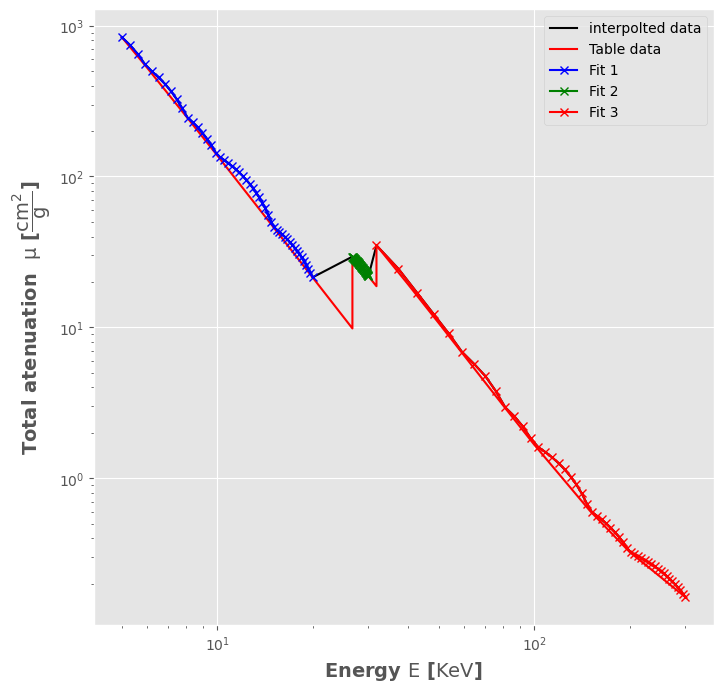

In [5]:
#WE NOW REPRESENT THE EXTRAPOLATION AND THE ORIGINAL DATA

plt.figure(figsize=(8,8))
plt.plot(x_interpolation, y_interpolation, 'k-', label = 'interpolted data')
plt.plot(energy, mu, 'r-', label='Table data')
plt.plot(xvals1, yinterp1, 'bx-', label='Fit 1')
plt.plot(xvals2, yinterp2, 'gx-', label='Fit 2')
plt.plot(xvals3, yinterp3, 'rx-', label='Fit 3')

plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')

## **Efficiency**

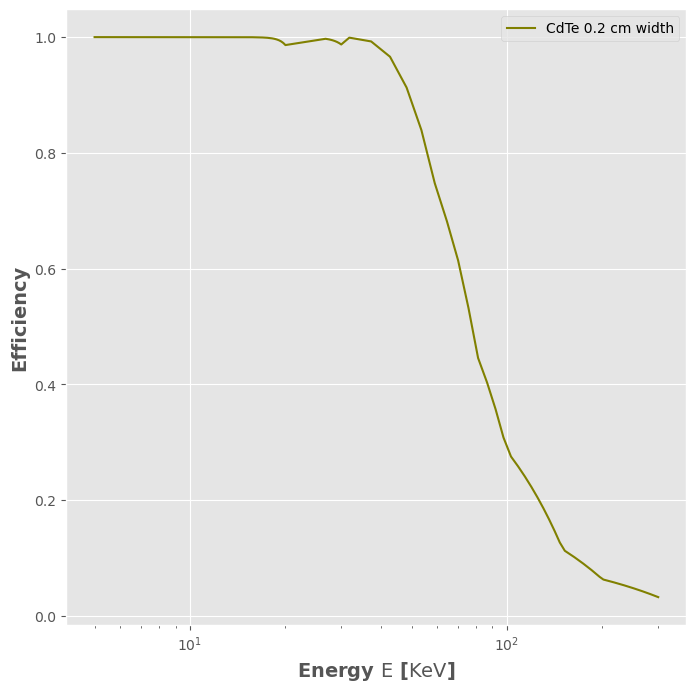

In [6]:
#WE THEN CALCULATE THE EFFICIENCY OF OUR DETECTOR:

#NOW WE CALCULATE THE EFFICIENCY: e(E) = ( 1 - e^{- u * mu} )
#WE CHANGE THE NAME OF THE VARIABLES IN ORDER TO MAKE THEM EASIER TO UNDERSTAND

energy_1 = x_interpolation
mu_1 = y_interpolation

x = 0.2 #THICKNESS (IN CM) OF THE CdTe DETECTOR

efficiency = 1 - np.e**(-x * mu_1) #EFFICIENCY FUNCTION

#REPRESENTING ENERGY EFFICIENCY

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Efficiency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, efficiency, label='CdTe 0.2 cm width', color = 'olive') 
plt.xscale('log')
plt.legend(loc='best')


## **Background Noise: Aperture Leakage**

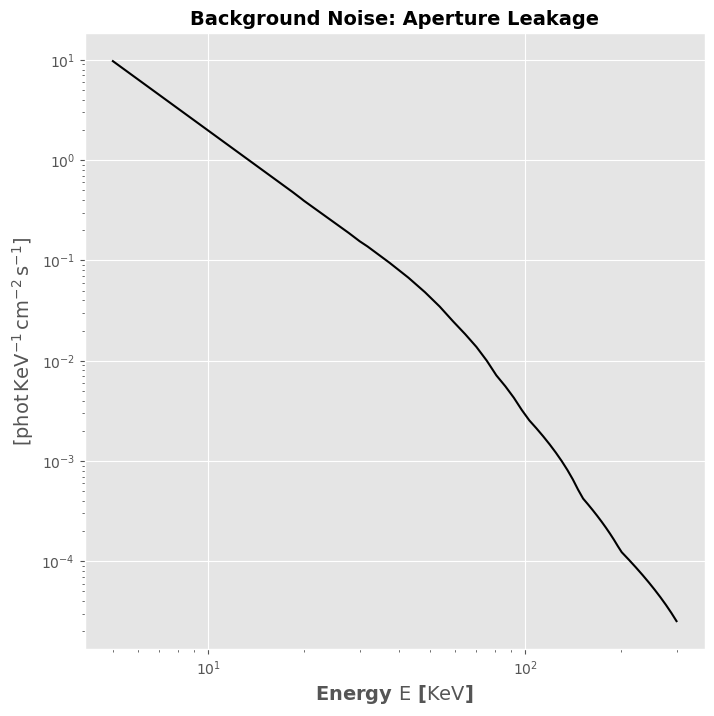

In [7]:
#NOW WE CALCULATE BACKGROUND NOISE: APERTURE LEAKAGE

#FOR THIS STEP, WE NEED THE OMEGA ANGLE 
omega = 4.64878 #THIS IS GIVEN BY OTHER CODE


#shielded region afected by the mask 

omega_1 = omega * 0.75
back_aperture_1 = omega_1*84.7* efficiency * energy_1**(-2.3)

#nonshielded

omega_2 =omega * 0.25
back_aperture_2 = omega_2*84.7* efficiency * energy_1**(-2.3)

#added together

back_aperture = back_aperture_1 + back_aperture_2


#WE REPRESENT THE BACK APERTURE AS A FUNCTION OF ENERGY

plt.figure(figsize=(8,8))
plt.title('Background Noise: Aperture Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, color = 'black') 
plt.xscale('log')
plt.yscale('log')

## **Thickness calculation**

In [8]:
'''
for the calculation of the thickness of our shield we have to calculate the thickness of CsI equivalent to the materials we have:
mu_CsI * x_CsI = x_material * mu_material

in case there are several materials, all of them must be used.
'''

x_Pb = 0.5 #cm
energy_CsI, mu_CsI = np.loadtxt("CsI_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND ATTENUATION COEFFICIENT COLUMNS 
energy_Pb, atenuation_Pb = np.loadtxt('Pb_data.txt', unpack=True, skiprows=2, usecols=(0,6)) 
thickness_Pb = x_Pb * (  atenuation_Pb / mu_CsI )
thickness_Pb = np.median(thickness_Pb)

print('the new thickness of Pb is:', thickness_Pb )

the new thickness of Pb is: 0.7836838499505836


In [9]:


x_Sn = 1 #cm
energy_Sn, atenuation_Sn = np.loadtxt('Sn_data.txt', unpack=True, skiprows=2, usecols=(0,6)) 
thickness_Sn = x_Sn * (  atenuation_Sn / mu_CsI )
thickness_Sn = np.median(thickness_Sn)

print('the new thickness of Sn is:', thickness_Sn )

the new thickness of Sn is: 0.8791537826581607


In [10]:

x_K = 0.1 #cm
energy_K, atenuation_K = np.loadtxt('K_data.txt', unpack=True, skiprows=2, usecols=(0,6)) 
thickness_K = x_K * (  atenuation_Sn / mu_CsI )
thickness_K = np.median(thickness_K)

print('the new thickness of K is:', thickness_K )

the new thickness of K is: 0.08791537826581608


## **Background Noise: Shield Leakage**

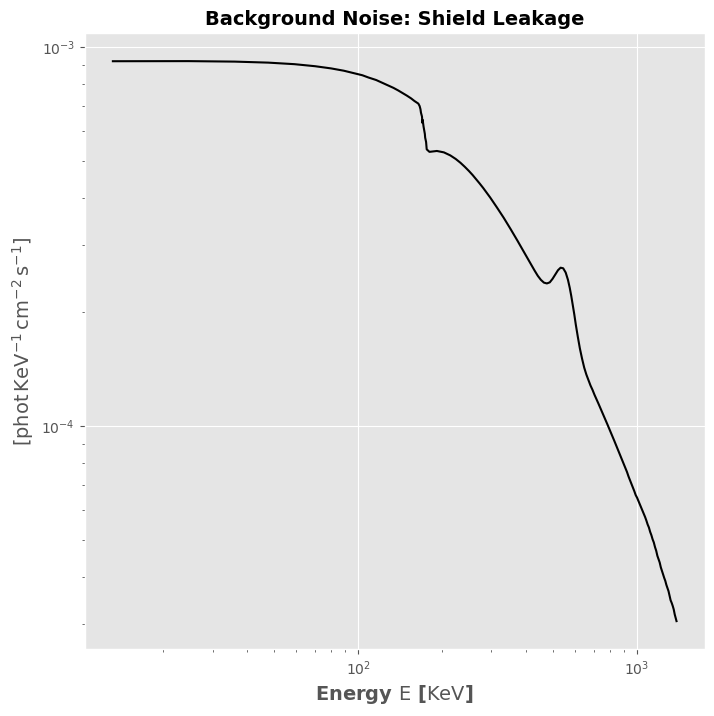

In [11]:
#WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND background spectrum 

energy2, b_5cm = np.loadtxt('shield_leakage_background_CsI_Tl_5cm.txt', unpack=True) 

#b_5cm is the background spectrum, taken from Figure 8. It refers to a 5 cm thick CsI(Tl) Veto shield.

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy2, b_5cm , color = 'black') 
plt.xscale('log')
plt.yscale('log')


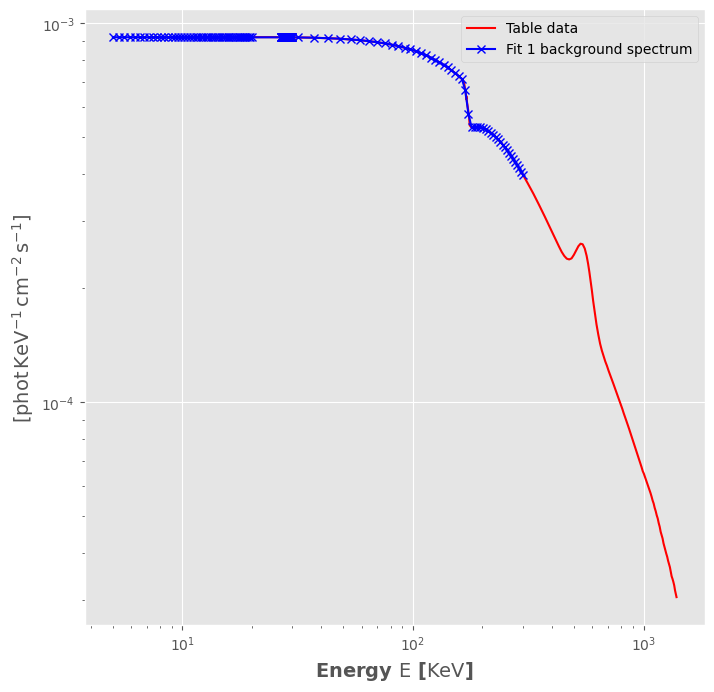

In [12]:
'''
TO MAKE A COMBINATION WITH THE DATA FOUND ABOVE, THE BACKGROUND HAS TO BE CALCULATED FOR THE 
ENERGY VALUES OF THE PRINCIPLE. FOR THIS WE MAKE USE OF THE INTERPOLATION.

'''

interval_x = energy_1
interval_y = np.interp(interval_x, energy2, b_5cm)

energy_2_modified = interval_x
b_5cm_modified = interval_y


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy2, b_5cm, 'r-', label='Table data')
plt.plot(interval_x, interval_y, 'bx-', label='Fit 1 background spectrum')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


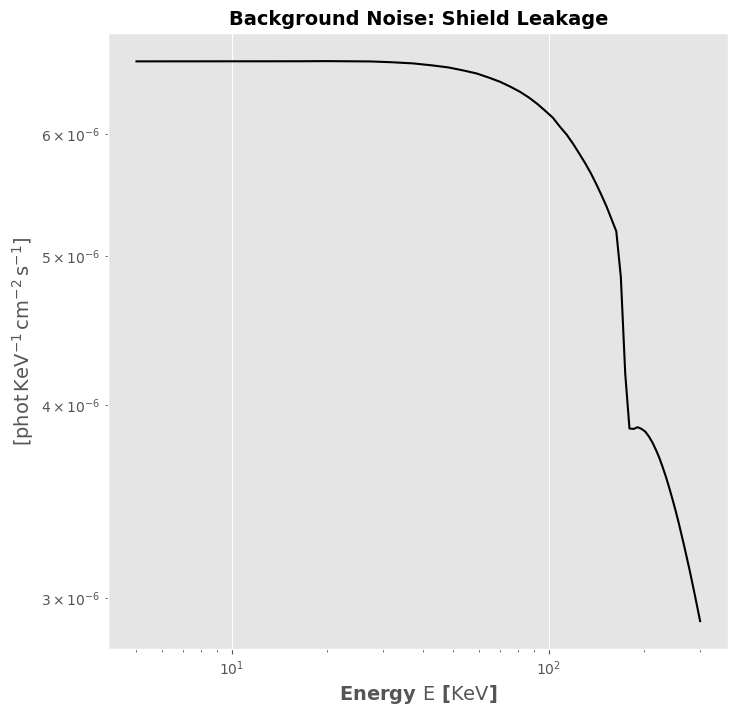

In [13]:
#WE NOW CALCULATE THE TOTAL CONTRIBUTION, USING THE EXPRESSION:

# B_{I} = e^{1- (x/5)} * 10^{-3} * B_{PH5CM}(E)

#THE FACTOR 10^{-3} IS DUE TO THE UNITS IN THE TABLE. PLEASE SEE COMPENDIUM, PAGE 175
#
area_detector =   18000  #area of detector to be used as shield (APPROXIMATE)
component_density = 6.06 #density of the material, DETECTOR


sigma_shield = 2 # (sigma shield thickness)
sigma_area = 825 #cm^2
NaI_density = 3.67

#THE CORRECTION FACTOR IS BECAUSE THE CHANGE OF DETECTOR MATERIAL, SO THE MASS IN CHANGED
correction_factor = ( (x * area_detector * component_density) / ( sigma_shield  * sigma_area * NaI_density) )

#WE NEED THE CORECTION FACTOR BECAUSE WE DON'T HAVE THIS TABLE FOR OTHER MATERIAL, 
#SO IT IS DERIVED FROM THIS BY A LAW OF PROPORTIONALITY. THIS IS ATTACHED IN THE DRIVE/GITHUB

b_i_pb =  b_5cm_modified * np.e**( 1 - (thickness_Pb/5)) *10**(-3) 
b_i_sn =  b_5cm_modified * np.e**( 1 - (thickness_Sn/5)) *10**(-3) 
b_i_k =  b_5cm_modified * np.e**( 1 - (thickness_K/5)) *10**(-3) 
b_i = b_i_pb + b_i_sn + b_i_k

#WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_2_modified , b_i, color = 'black') 
plt.xscale('log')
plt.yscale('log')


## **Background Noise: Neutron and Spallation**

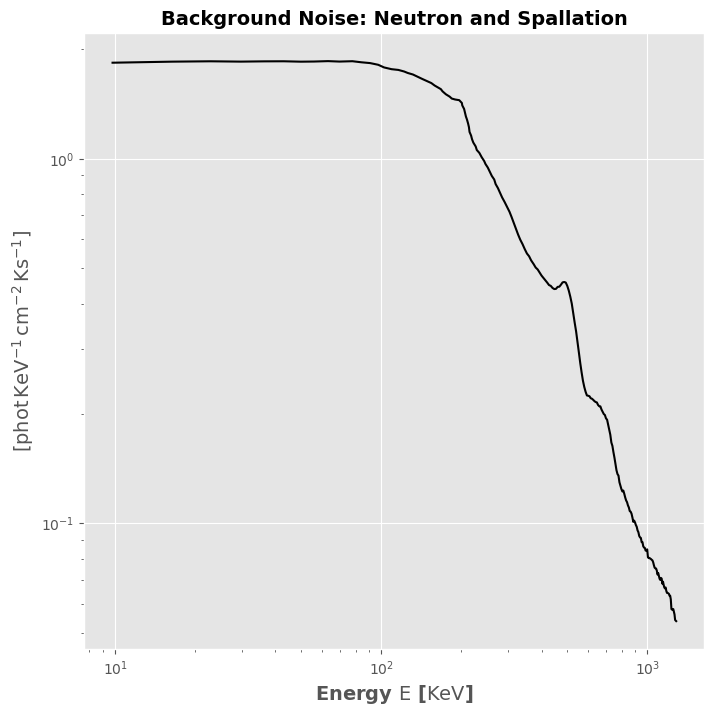

In [14]:
'''
FOR THIS STEP IS THE SAME AS THE PREVIOUS ONE: LOAD THE TABLES AND INTERPOLATE TO OBTAIN THE BACKGROUND VALUE.

'''

energy3, b_fig = np.loadtxt('neutron_spallation_background_NaI_Tl_2cm_4p7GV.txt', unpack=True)
#LATER IT WILL BE MULTIPLIED BY 10^{-3} BECAUSE IT IS IN KILOSECONDS, 
#THAT'S WHY WHEN SWITCHING TO SECONDS THIS FACTOR IS INTRODUCED

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy3, b_fig , color = 'black') 
plt.xscale('log')
plt.yscale('log')

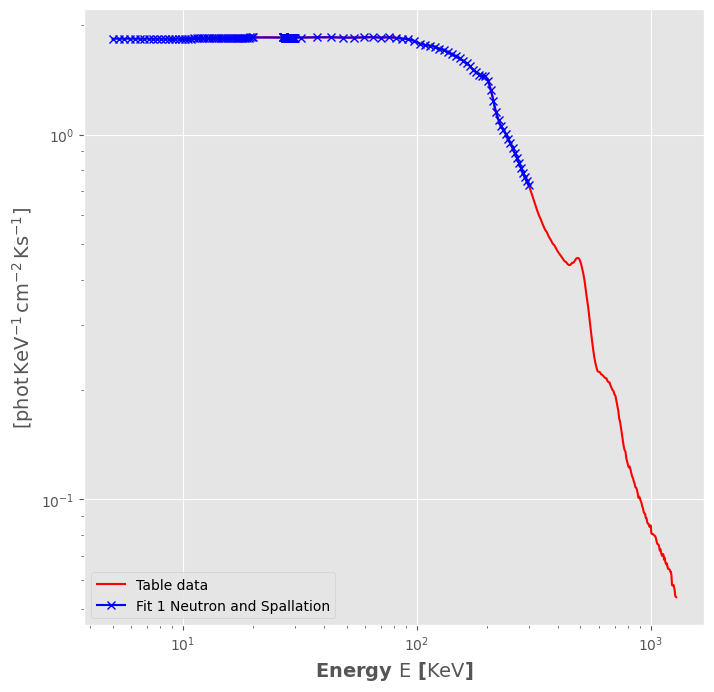

In [15]:
#AS IN THE PREVIOUS STEP, WE PROCEED WITH INTERPOLATION.

interval_x_2 = energy_1
interval_y_2 = np.interp(interval_x_2, energy3, b_fig)

energy_3_modified = interval_x_2
b_fig_modified = interval_y_2


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy3, b_fig, 'r-', label='Table data')
plt.plot(interval_x_2, interval_y_2, 'bx-', label='Fit 1 Neutron and Spallation')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


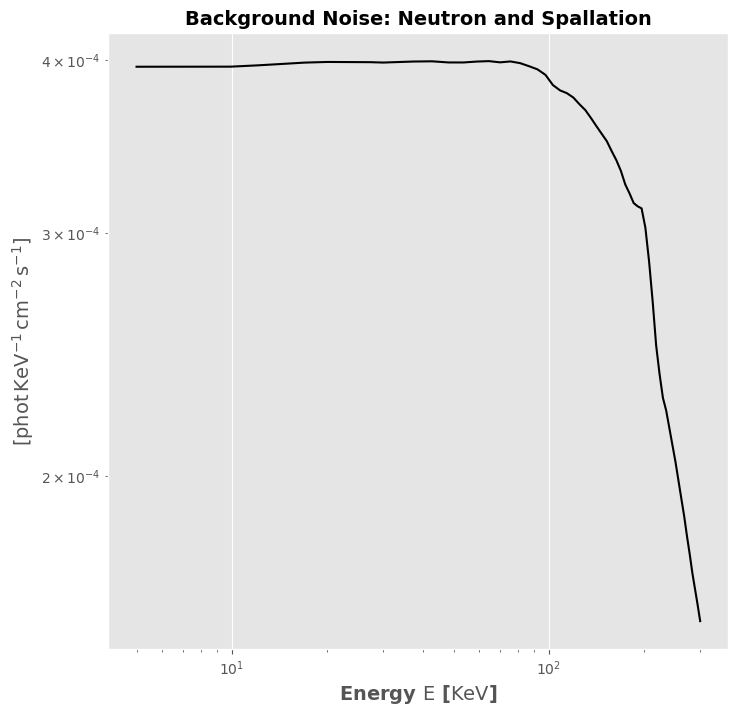

In [16]:
'''
RIGIDITY CORRECTION (if LEO to be calculated with R_C = 15.6 * L^-2, SEE PAGE 174 COMPENDIUM. 
FOR OUR ORBIT: 15.6 * ((1.1)**(-2) ))
NOTE, OUR ORBIT IS ECUATORIAL, SO GEOGRAPHIC SOUTH DEGREE = 0, BUT ON THE GRAPH DOESN'T APPEAR L VALUE FOR THAT, SO WE TAKE 
THE LOWER POSSIBLE
'''
corr_rig = 0.6    
corr_mat = x / 2  # detector material correction
b_ns = corr_rig * corr_mat * b_fig_modified*10**(-3)* correction_factor


plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_3_modified, b_ns, color = 'black') 
plt.xscale('log')
plt.yscale('log')


## **ALL CONTRIBUTIONS**

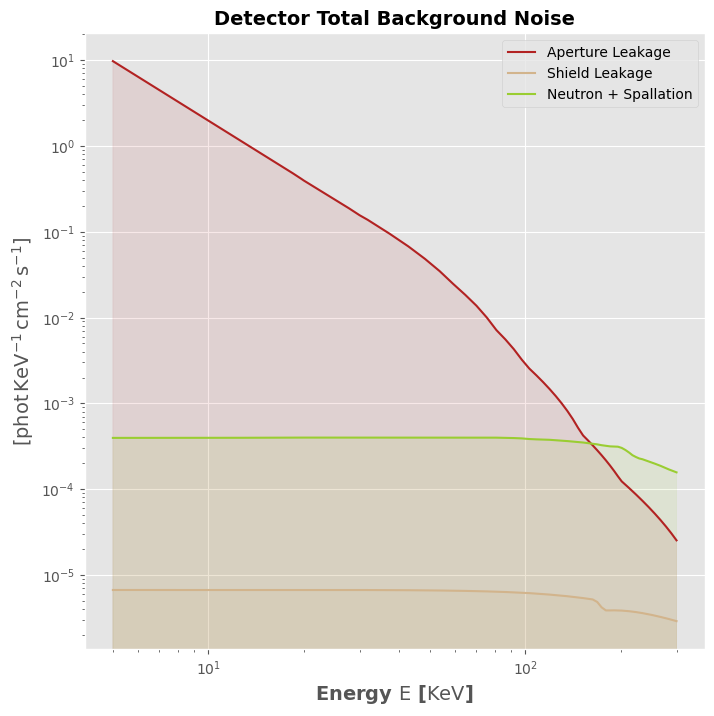

In [17]:
# WE ADD UP ALL THE CONTRIBUTIONS OF THE DIFFERENT EFFECTS TO SEE THE TOTAL RESPONSE.
b_t = b_ns + b_i + back_aperture
plt.figure(figsize=(8,8))
plt.title('Detector Total Background Noise', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, label='Aperture Leakage', color = 'firebrick') 
plt.plot(energy_2_modified , b_i, label='Shield Leakage', color = 'tan') 
plt.plot(energy_3_modified, b_ns, label='Neutron + Spallation', color = 'yellowgreen')
#plt.plot(energy_1, b_t, label='all terms', color = 'black')


plt.fill_between(energy_1, back_aperture, color = 'firebrick', alpha=0.1)
plt.fill_between(energy_2_modified , b_i, color = 'tan', alpha=0.1)
plt.fill_between(energy_3_modified, b_ns, color = 'yellowgreen', alpha=0.1)
#plt.fill_between(energy_1, b_ns + b_i + back_aperture, color = 'black', alpha=0.2)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')


## **Sensitivity curve, T = 2 sec**

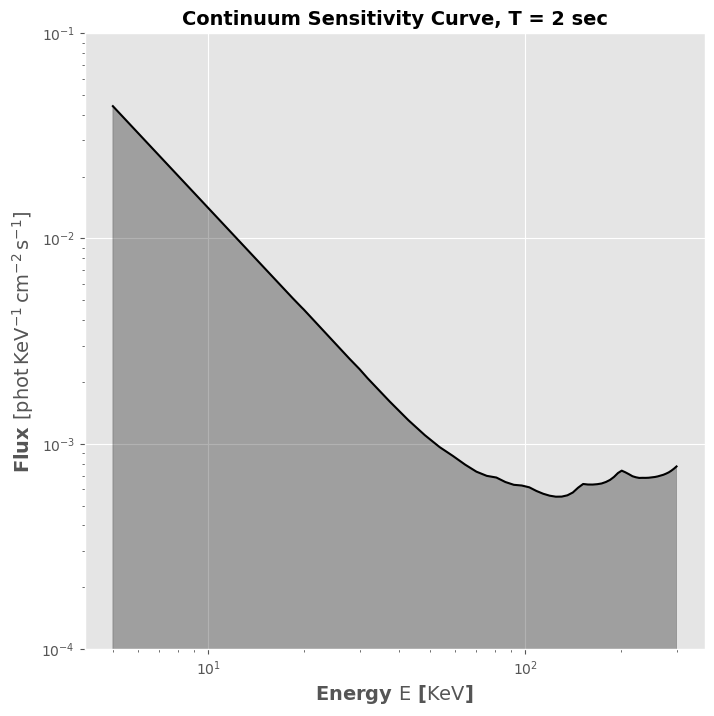

In [25]:

# Sensitivity curve 
sigma = 3
A = area_detector    
T_1 = 2
f_min = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_1 * energy_1) )

plt.figure(figsize=(8,8))
plt.title('Continuum Sensitivity Curve, T = 2 sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min, 'black')
plt.fill_between(energy_1, f_min, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 1e-1)
plt.show()

## **Sensitivity curve, T = 2732 sec**

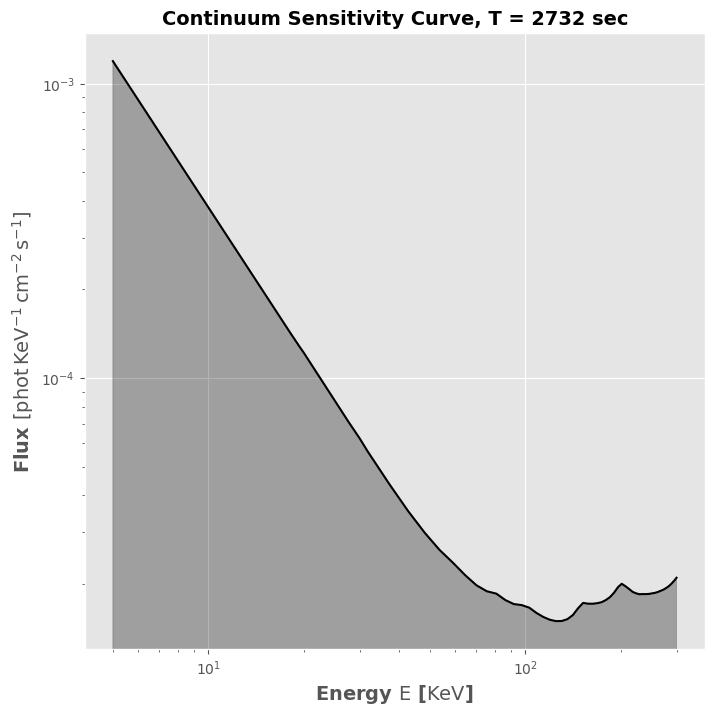

In [27]:
# FUNCIÓN DE SENSIBILIDAD 

T_2 = 2732
f_min_20seg = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_2 * energy_1) )

plt.figure(figsize=(8,8))
plt.title('Continuum Sensitivity Curve, T = 2732 sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_20seg, 'black')
plt.fill_between(energy_1, f_min_20seg, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

## **Sensitivity curve, T = $10^{5}$ sec**

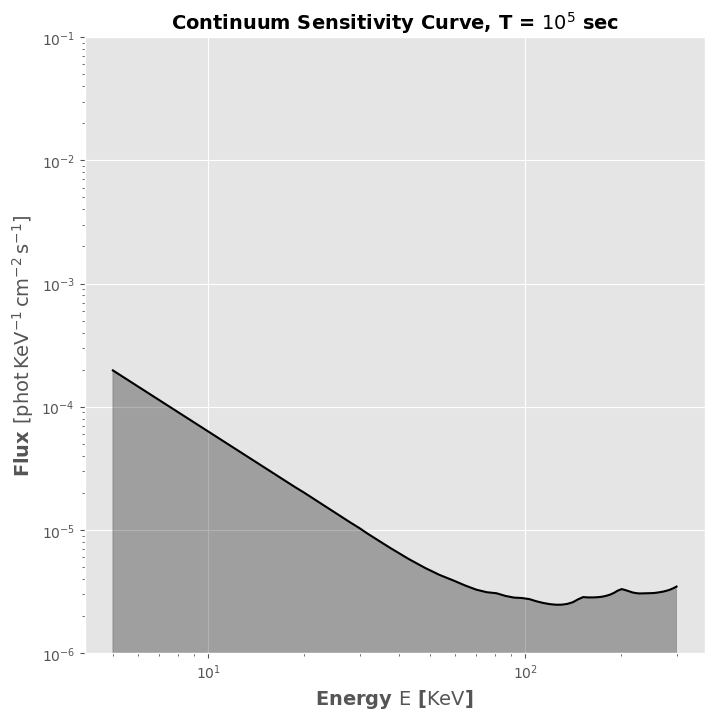

In [26]:
# FUNCIÓN DE SENSIBILIDAD 

T_3 = 1e5
f_min_10_5seg = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T_3 * energy_1) )

plt.figure(figsize=(8,8))
plt.title('Continuum Sensitivity Curve, T = $10^{5}$ sec', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min_10_5seg, 'black')
plt.fill_between(energy_1, f_min_10_5seg, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6, 1e-1)
plt.show()

## **Combination Sensitivity curve, T = 1 and 2732 sec**

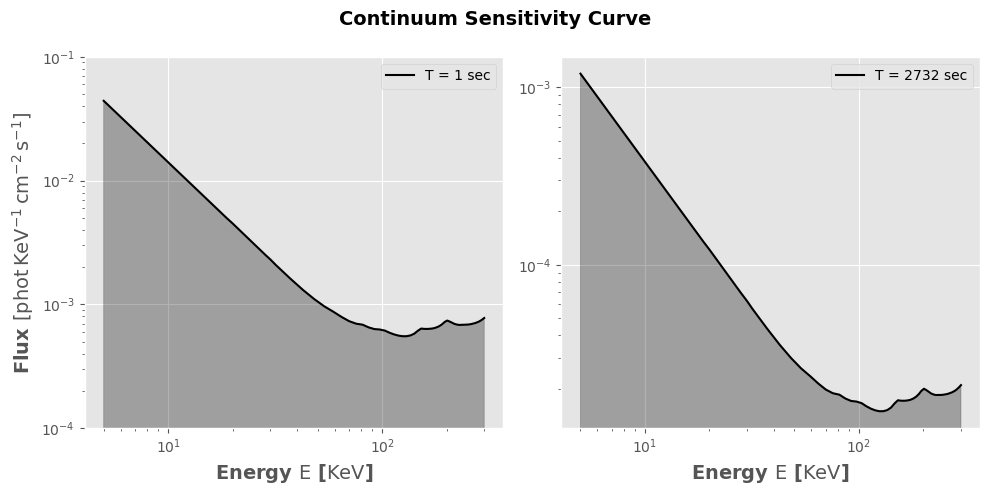

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Continuum Sensitivity Curve', fontsize=14, fontweight='bold')

ax1.plot(energy_1, f_min, 'black', label = 'T = 1 sec')
ax1.fill_between(energy_1, f_min, color='black', alpha=0.3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(1e-4, 1e-1)
ax1.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax1.set_ylabel('Flux $\mathrm{[phot \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontsize=14, fontweight='bold')
ax1.legend(loc='best')

ax2.plot(energy_1, f_min_20seg, 'black', label = 'T = 2732 sec')
ax2.fill_between(energy_1, f_min_20seg, color='black', alpha=0.3)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontsize=14, fontweight='bold')
ax2.legend(loc='best')

plt.tight_layout()

plt.show()


## **Save data to a CSV file**

In [28]:
import pandas as pd
time_1 = pd.DataFrame({'Energy': energy_1, 'Flux': f_min})
time_1.to_csv('data_detector_1sec.csv', index=False)

In [29]:
time_20 = pd.DataFrame({'Energy': energy_1, 'Flux': f_min_20seg})
time_20.to_csv('data_detector_20sec.csv', index=False)

In [30]:
time_10e5 = pd.DataFrame({'Energy': energy_1, 'Flux': f_min_10_5seg})
time_10e5.to_csv('data_detector_1e5sec.csv', index=False)